In [8]:
from tkinter import *
import webbrowser
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

def reg_petrol(barrelrs,petrol):

    n=len(barrelrs)
    mean_barrelrs,mean_petrol=round(np.mean(barrelrs),3),round(np.mean(petrol),3)
    
    Exp_XY = np.sum(barrelrs*petrol)/ n
    Exp_X2 = np.sum (barrelrs*barrelrs)/n
    
    a=(Exp_XY - mean_barrelrs * mean_petrol) / (Exp_X2 - mean_barrelrs**2)
    b=mean_petrol - a *mean_barrelrs

    return (a,b)


def reg_diesel(barrelrs,diesel):
    
    n=len(barrelrs)
    mean_barrelrs,mean_diesel=round(np.mean(barrelrs),3),round(np.mean(diesel),3)

    Exp_XY = np.sum(barrelrs*diesel)/ n
    Exp_X2 = np.sum (barrelrs*barrelrs)/n

    a=(Exp_XY - mean_barrelrs * mean_diesel) / (Exp_X2 - mean_barrelrs**2)
    b=mean_diesel - a *mean_barrelrs
    
    return (a,b)

def petrol_plot_regression_line(barrelrs, petrol, coeff):
    plt.scatter(barrelrs, petrol, color = "r", marker = "o", s = 5) 
    y_pred = coeff[0]*barrelrs + coeff[1]
    
    plt.plot(barrelrs, y_pred, color = "blue")
    
    plt.title('Petrol Price vs Barrel Price (in Rs.)')
    plt.xlabel('Barrel Price (in Rs.)') 
    plt.ylabel('Petrol Price (in Rs.)')
    
    plt.axis([2500,6000,60,85])
    plt.show()


def diesel_plot_regression_line(barrelrs, diesel, coeff):  
    plt.scatter(barrelrs, diesel, color = "g",marker = "o", s = 5) 
    y_pred = coeff[0]*barrelrs + coeff[1]

    plt.plot(barrelrs, y_pred, color = "blue")

    plt.title('Diesel Price vs Barrel Price (in Rs.)')
    plt.xlabel('Barrel Price (in Rs.)') 
    plt.ylabel('Diesel Price (in Rs.)')
    
    plt.axis([2500,6000,50,80])
    plt.show()

def ShowPredDieselPrice(coeff2):
    o2=float(Entry.get(Oil_BarrelPrice_Entry_Price))
    d2=float(Entry.get(Dollar_Equivalent_Entry_Price))
    print ('\nPredicted Diesel Price (in Rs): ',end=' ')
    ans=round(float(coeff2[0])*d2*o2+float(coeff2[1]),2)
    print (ans)

def ShowPredPetrolPrice(coeff1):
    o1=float(Entry.get(Oil_BarrelPrice_Entry_Price))
    d1=float(Entry.get(Dollar_Equivalent_Entry_Price))
    print ('\nPredicted Petrol Price (in Rs):', end=' ')
    ans=round(float(coeff1[0])*d1*o1+float(coeff1[1]),2)
    print (ans)

def openxcel():
    webbrowser.open(r'C:\Users\subha\Desktop\Fuel_Datasheet.csv')

#Actual PROGRAM
petrol=[]
diesel=[]
barrelrs=[]

with open(r'C:\Users\subha\Desktop\Fuel_Datasheet.csv','r') as csvfile:
    csvreader=csv.reader (csvfile,delimiter=',')

    for row in csvreader:
        petrol.append(row[6])
        diesel.append(row[7])
        barrelrs.append(row[10])


del barrelrs[0:3]
del petrol[0:3]
del diesel[0:3]

for i in range (len(barrelrs)):
    barrelrs[i]=float(barrelrs[i])
for i in range (len(petrol)):
    petrol[i]=float(petrol[i])
for i in range (len(diesel)):
    diesel[i]=float(diesel[i])

coeff1=reg_petrol(np.array(barrelrs),np.array(petrol)) 
coeff2=reg_diesel(np.array(barrelrs),np.array(diesel))


Predicted Petrol Price (in Rs): 93.41


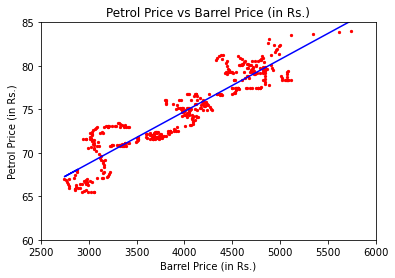

In [12]:
#TKINTER
root=Tk()
root.title('Petrol and Diesel Price Predictor')
root.minsize(400,150)
root.maxsize(400,150)

menu = Menu(root) 
root.config(menu=menu) 
filemenu = Menu(menu) 
menu.add_cascade(label='File', menu=filemenu) 
filemenu.add_command(label='Show Dataset', command=openxcel) 
filemenu.add_separator()
filemenu.add_command(label='Exit', command=root.quit) 

InputFrame = Frame (root)
InputFrame.pack(side=TOP)

ButtonFrame = Frame (root)
ButtonFrame.pack(side=TOP)

Dollar_Equivalent_Entry_Prompt = Label (InputFrame,text='Enter Dollar rate : ')
Dollar_Equivalent_Entry_Prompt.grid (row=1,column=0,rowspan=2)
Oil_BarrelPrice_Entry_Prompt = Label (InputFrame,text='Enter Barrel Price : ') 
Oil_BarrelPrice_Entry_Prompt.grid (row=5,column=0,rowspan=2)

Dollar_Equivalent_Entry_Price = Entry (InputFrame)
Dollar_Equivalent_Entry_Price.grid (row=1,column=30)
#dol_to_predict=Dollar_Equivalent_Entry_Price.get()

Oil_BarrelPrice_Entry_Price = Entry (InputFrame)
Oil_BarrelPrice_Entry_Price.grid (row=5,column=30)
#oil_to_predict=Oil_BarrelPrice_Entry_Price.get()

Button_PredictDieselPrice = Button (ButtonFrame,text='Predict Diesel Price',command=lambda : ShowPredDieselPrice(coeff2))
Button_PredictDieselPrice.grid (row=10,column=1,sticky='n')

Button_PredictPetrolPrice = Button (ButtonFrame,text='Predict Petrol Price',command=lambda : ShowPredPetrolPrice(coeff1))
Button_PredictPetrolPrice.grid (row=10,column=5,sticky='n')

Button_PlotDieselPrice = Button (ButtonFrame,text='Plot Diesel Price',command=lambda : diesel_plot_regression_line(np.array(barrelrs), np.array(diesel), coeff2))
Button_PlotDieselPrice.grid (row=13,column=1,sticky='s')

Button_PlotPetrolPrice = Button (ButtonFrame,text='Plot Petrol Price',command=lambda : petrol_plot_regression_line(np.array(barrelrs), np.array(petrol), coeff1))
Button_PlotPetrolPrice.grid (row=13,column=5,sticky='s')

root.mainloop()